Digit Recognizer Using Convolution Neural Network
>   1. Import the Libraries
>   2. Load the data
>   3. Visualizing the shape of train and test data
>   4. Normalization of data
>   5. Visualization of image
>   6. Create the Convolution Model 
>        1. Add the Convolution Layer
>        2. Add the MaxPooling Layer
>        3. Add the Flatten Layer 
>        4. Add the Dense Layer
>   7. Compile the Model
>   8. Train the Model
>   9. Visualizing the Accuracy of Model
>   10. Prediction on Test data

1. Import the Libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv


2. Load the data

In [3]:
df_train = pd.read_csv('../input/digit-recognizer/train.csv')
df_test = pd.read_csv('../input/digit-recognizer/test.csv')

3. Visualizing the shape of train and test data

In [4]:
df_train.shape

(42000, 785)

In [5]:
df_test.shape

(28000, 784)

In [6]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
height = 28
width = 28
classes =10

4. Normalization of data

In [9]:
x_train = df_train.drop(['label'], axis = 1).to_numpy().reshape(42000, 28, 28, 1).astype('float32')
x_train /= 255.
y_train = tf.keras.utils.to_categorical(df_train['label'], classes)

x_test = df_test.to_numpy().reshape(28000, 28, 28, 1).astype('float32')
x_test /= 255.

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 28, 28, 1)
(42000, 10)
(28000, 28, 28, 1)


5. Visualization of image

Output = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


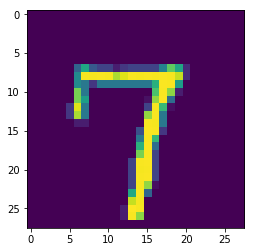

In [11]:
g = plt.imshow(x_train[6,:,:,0])
print("Output = " +str(y_train[6,:]))

*Now, we will have to predict for test set. So that's why we will create the Convolution Model*

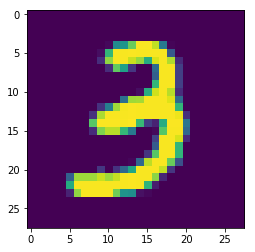

In [12]:
g = plt.imshow(x_test[7,:,:,0])

6. Create the Convolution Model 
>    1. Add the Convolution Layer
>    2. Add the MaxPooling Layer

In [13]:
model =  models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size =(3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size =(3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size =(3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


   3. Add the Flatten Layer 
   4. Add the Dense Layer

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

7. Compile the Model

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

8. Train the Model

In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_split = 0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 6s 216us/sample - loss: 0.1963 - acc: 0.9388 - val_loss: 0.0841 - val_acc: 0.9752
Epoch 2/10
29399/29399 [==============================] - 5s 163us/sample - loss: 0.0554 - acc: 0.9843 - val_loss: 0.0509 - val_acc: 0.9844
Epoch 3/10
29399/29399 [==============================] - 5s 164us/sample - loss: 0.0357 - acc: 0.9889 - val_loss: 0.0532 - val_acc: 0.9827
Epoch 4/10
29399/29399 [==============================] - 5s 164us/sample - loss: 0.0279 - acc: 0.9911 - val_loss: 0.0520 - val_acc: 0.9833
Epoch 5/10
29399/29399 [==============================] - 5s 161us/sample - loss: 0.0214 - acc: 0.9931 - val_loss: 0.0429 - val_acc: 0.9874
Epoch 6/10
29399/29399 [==============================] - 5s 163us/sample - loss: 0.0186 - acc: 0.9947 - val_loss: 0.0425 - val_acc: 0.9891
Epoch 7/10
29399/29399 [==============================] - 5s 161us/sample - loss: 0.0142 - acc: 0.9949 - val_l

9. Visualizing the Accuracy of Model

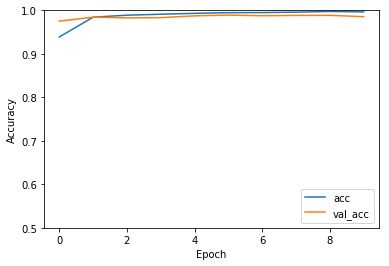

In [19]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

*Now,  it's  time  to  see  a  prediction!*

10. Prediction on Test data

Output = 3


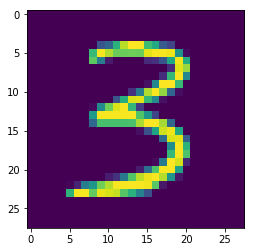

In [20]:
y_predict = model.predict_classes(x_test, verbose=0)
m = plt.imshow(x_test[9,:,:,0])
print("Output = " +str(y_predict[9]))

In [21]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_predict)+1)),
                         "Label": y_predict})
submissions.to_csv("sub.csv", index=False, header=True)